## 1. Train 데이터 로딩

In [1]:
# train 데이터 로딩
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

file_path = 'C:\\Users\\rkdtj\\Desktop\\titanic\\train.csv'
df = pd.read_csv(file_path)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Train 데이터의 각 필드 데이터 분포 확인

In [2]:
# 2. Train 데이터의 각 필드 데이터분포(평균, 최소값, 최대값, 등)를 확인하세요.

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. 각 컬럼의 데이터 타입을 확인하세요

In [3]:
# 3. 각 컬럼의 데이터 타입을 확인하세요.

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. 각 컬럼의 null값 유무를 확인하세요

<AxesSubplot:>

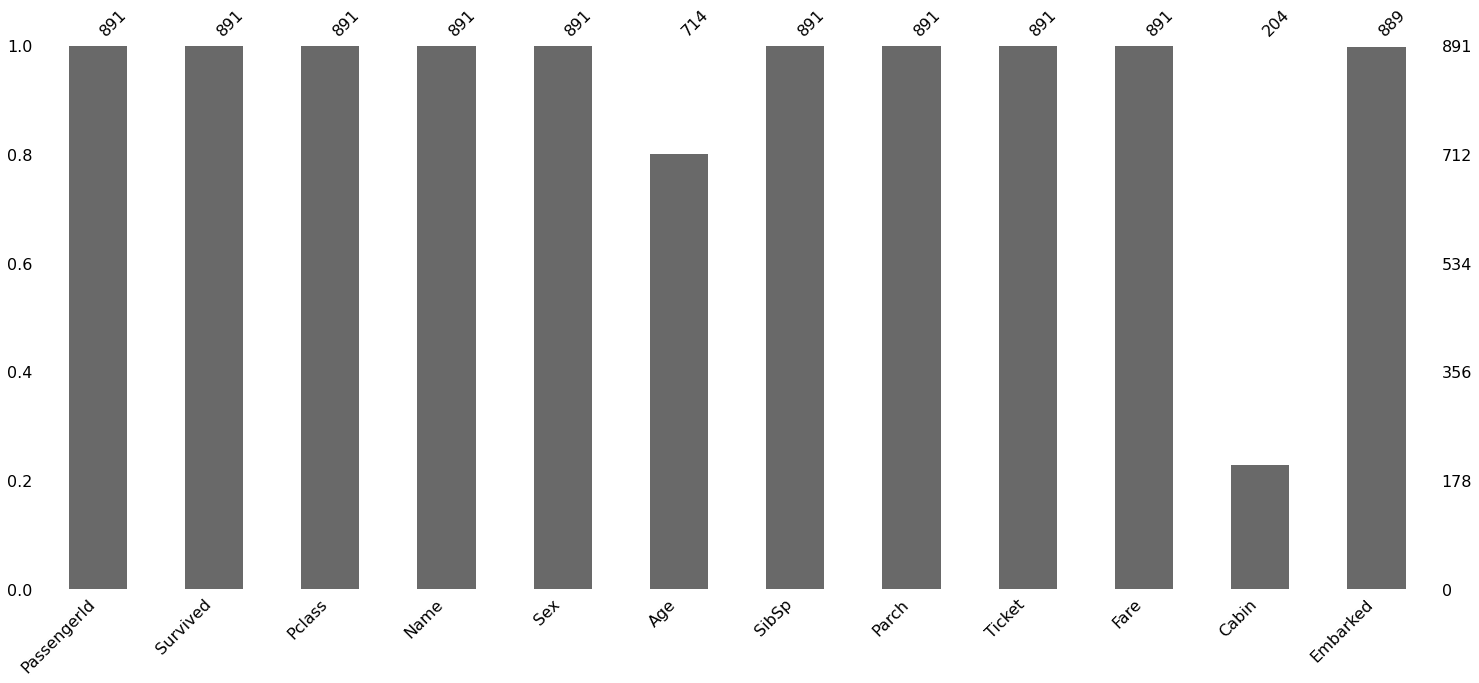

In [4]:
# 각 컬럼의 null값 유무를 확인하세요.

import missingno as msno
msno.bar(df)

In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## 5. 각 컬럼별 결측치의 크기를 확인하세요

In [6]:
# 5. 각 컬럼별 결측치의 크기를 확인하세요.

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 6. 각 컬럼별 null값과 결측치의 상태를 참고해 결측치 혹은 null값 처리 방법, 이유

In [7]:
# 6. 각 컬럼별 null값과 결측치의 상태를 참조해 
# 결측치 혹은 null값의 처리 방법(제거, 할당, 혹은 추정)을 결정하고 이유를 설명하세요.

df['Age'] = df['Age'].fillna(df['Age'].mean()) # 나이의 결측치를 나이의 평균값으로 대체
df['Age'] = df['Age'].round() # 나이에 소수점으로 되어있는 것을 반올림시켜줌

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df['Embarked'] = df['Embarked'].fillna('S')  # 탑승항구는 결측치가 2개뿐이라 가장 높은 빈도를 보이는 'S'로 대체

<AxesSubplot:>

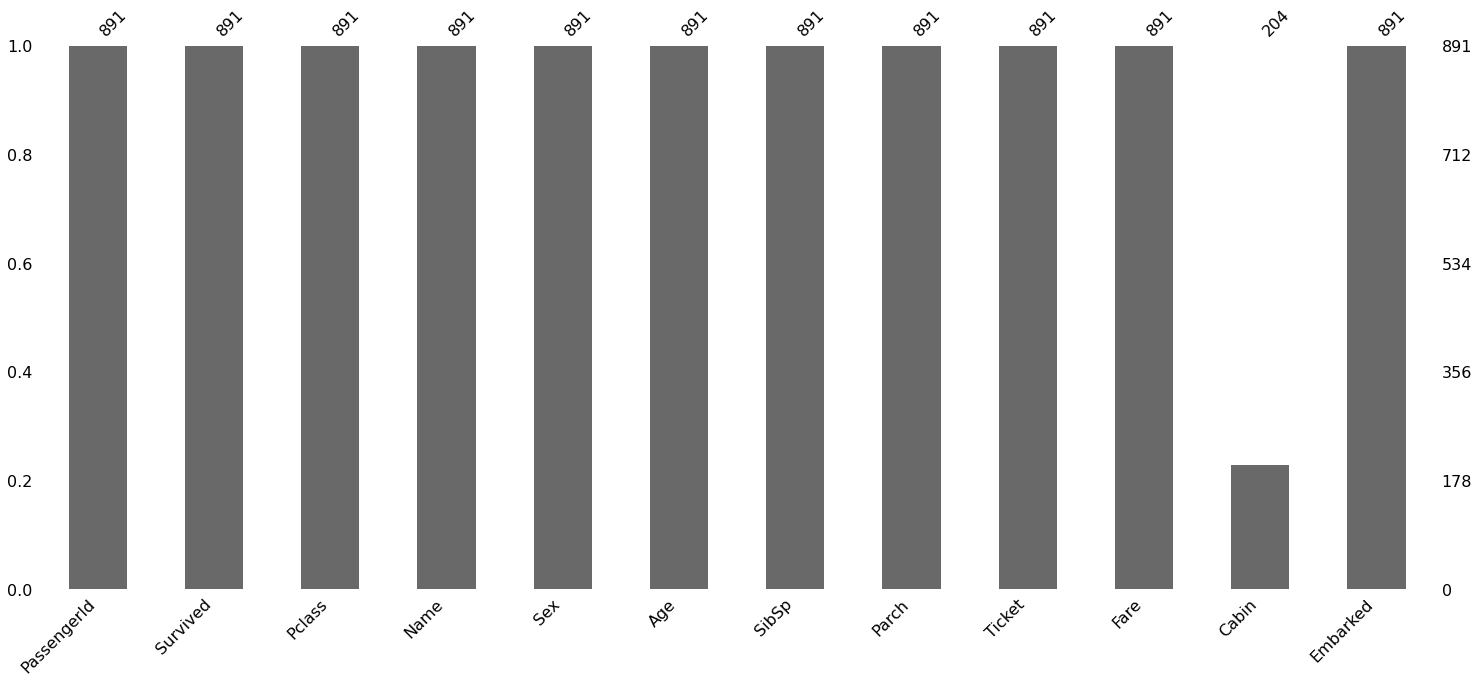

In [10]:
msno.bar(df)

In [11]:
# 객실번호는 결측치가 너무 크기 때문에 제거

df = df.dropna(axis = 1)

<AxesSubplot:>

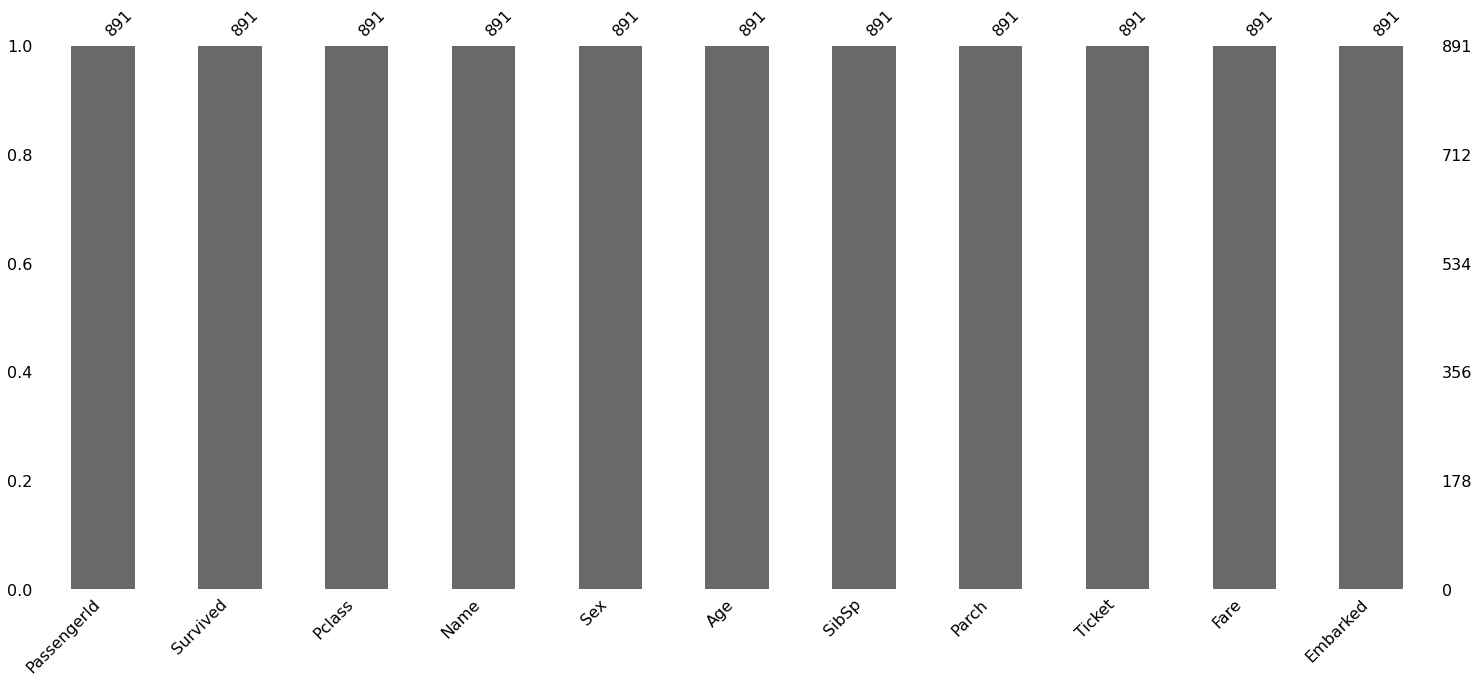

In [12]:
msno.bar(df)

## 7. 사용할 컬럼과 버릴 컬럼 결정/이유

#### 7. 6번을 실행하며 PassengerID의 생존여부를 추정하는데 사용할 컬럼과 버릴 컬럼을 결정하고 이유를 설명하세요.

#### Name -> 생존자 이름은 생존여부와는 연관성이 없음
#### ticket, Embarked -> 승객이 모두 탑승한 상황에서 발생한 사건이기 때문에 생존여부를 추정하는데 필요없다 판단
#### Fare -> 요금은 Pclass(객실등급)으로 어느정도 판단할 수 있다 생각하여 분석할땐 필요없다 판단
#### ==========================================================================
#### Survived -> 생존여부를 알려주는 열이니 사용 컬럼
#### Pclass -> 각 객실등급 위치 따라 탈출 위치가 다를 것임으로 생존과 직결된 연관성이 있으리라 핀단
#### Sex -> 남 여 생존여부를 보고 남여가 탈출을 시도 할때의 역할을 판단 할 수단이 될 것임
#### Age -> 미성년, 성년, 노년에 따라 생존 여부를 보고 당시 상황을 추측 할 수 있을 것이라 판단
#### SibSp -> 함께 탑승한 배우자+형제 수에 따라 생존여부를 확인 할 용도
#### Parch -> 가족의 총 인원에 따라 생존여부를 확인 할 용도

## 8. 결측치/null값 보정, 사용 컬럼 결정 이후 사용 컬럼별 데이터 분포 히스토그램

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


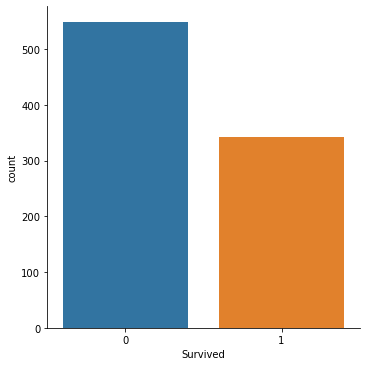

In [13]:
# 8. 결측치/null값 보정, 사용 컬럼 결정 이후 사용 컬럼별 데이터 분포 히스토그램

sns.catplot('Survived', kind = 'count', data = df)  # Survived

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


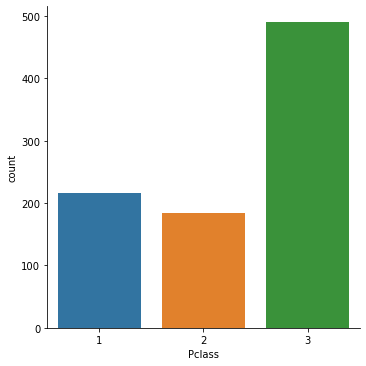

In [14]:
sns.catplot('Pclass', kind = 'count', data = df) # 객실 등급

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


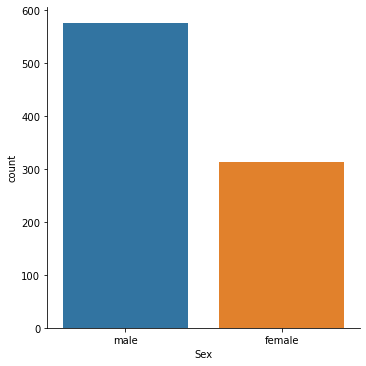

In [15]:
sns.catplot('Sex', kind = 'count', data = df)  # 남녀 성비

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


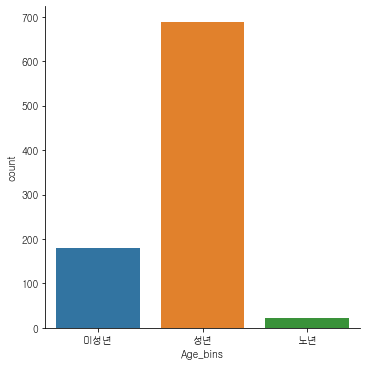

In [16]:
# 나이 -> 미성년, 성년, 노년으로 구분

from matplotlib import font_manager, rc
font_path = "C://Windows//Fonts//NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
# 한글폰트 설정

bins = [-1, 20, 60, 100]
age = pd.cut(df['Age'], bins, labels = ['미성년', '성년', '노년'])
df['Age_bins'] = age
sns.catplot('Age_bins', kind = 'count', data = df)

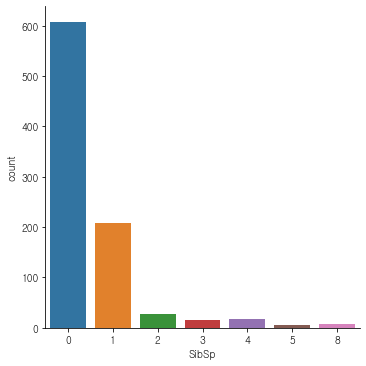

In [17]:
# SibSp

sns.catplot('SibSp', kind = 'count', data = df)

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


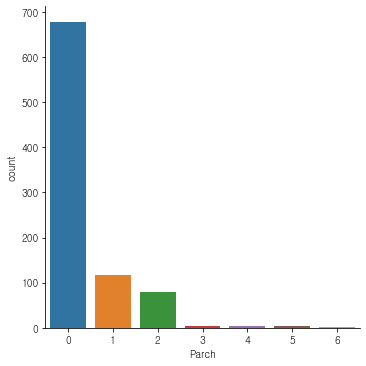

In [18]:
# Parch

sns.catplot('Parch', kind = 'count', data = df)

## 9. 생존자와 사망자별 특징 분석

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


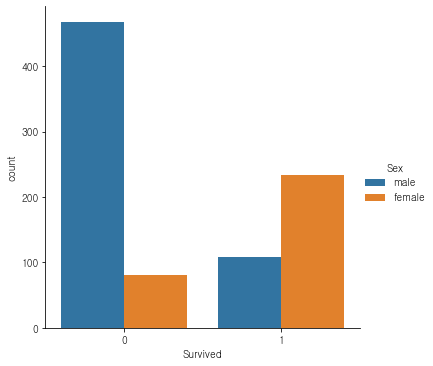

In [19]:
# 9. 생존자와 사망자별 특징 분석
# 성별 생존자 분석

sns.catplot('Survived', kind = 'count', hue = 'Sex', data = df)

#### 사망자가 남성이 많고, 생존자는 여성이 많은것을 볼 수 있다.(남성의 생존확률이 낮음)
#### 레이디 퍼스트로 인한 현상으로 추정 됨

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


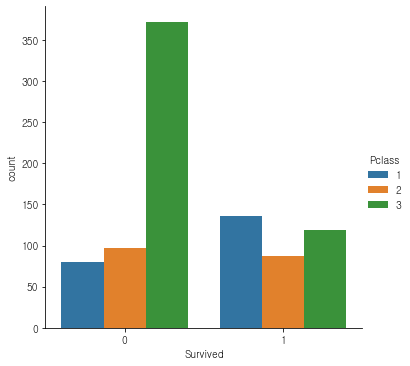

In [20]:
# 생존자와 객실 등급 분석
sns.catplot('Survived', kind = 'count', hue = 'Pclass', data = df)

#### 객실 등급별 사망자를 보면, 3등급의 사망수가 많은 것을 볼 수 있다. 그리고 2등급 1등급 순으로 많다.
#### 이는 3등급이 배의 아래쪽에 위치했음을 추측할 수 있다. 위쪽 사람들 부터 탈출 했을 것으로 추정
#### 생존자 그래프를 봐도 1등급 객실 생존수가 많음을 볼 수 있다.

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


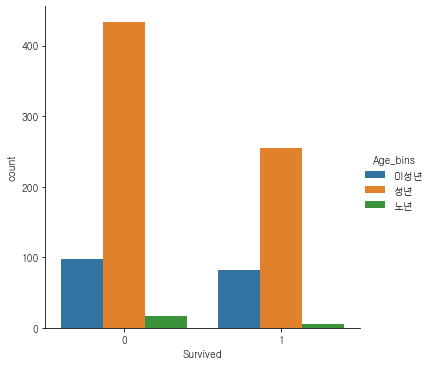

In [21]:
# 미성년 성년 노년의 생존률 분석

sns.catplot('Survived', kind = 'count', hue = 'Age_bins', data = df)

#### 일단 성년의 수가 제일 많으니 사망자와 생존자 모두 성년이 많게 측정 됨
#### 미성년의 사망률이 조금 더 큰 것으로 나타나는데, 몸이 성년보다 약해서 바다에서 오래 버티지 못했을 것 같다 추정
#### 노년의 사망률이 더 큰데, 나이가 많으신 분들이 자기보다 더 건강한 성년과 미래가 많이 남은 미성년을 먼저 구출 했을 것으로 추정

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


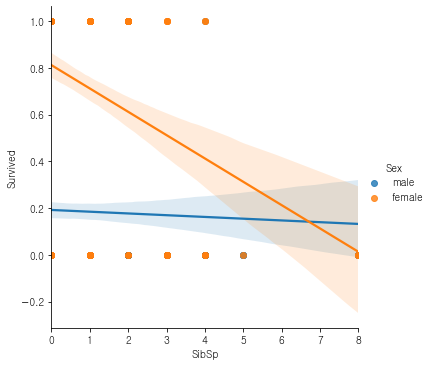

In [22]:
# 배우자+형제수 생존자

sns.lmplot('SibSp','Survived', hue = 'Sex', data = df)

#### 배우자+형제 수가 많을수록 사망률이 높은것을 볼 수 있다.
#### 이는 인원수가 많을 수록 자기 배우자/형제를 먼저 구출해야 할 사람이 많아지니 나온 결과로 볼 수 있음

#### 남성의 사망자는 배우자+형제 수에 상관없이 전부 여성보다 높게 나타난다.
#### 그치만 형제+배우자의 수가 7명 이상일 부터 여성의 사망률이 높다.
#### 이는 인원이 많아질 수록 여성도 탈출을 도와주는 역할을 함으로써 사망하였을 것으로 추정된다.

C:\Users\rkdtj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


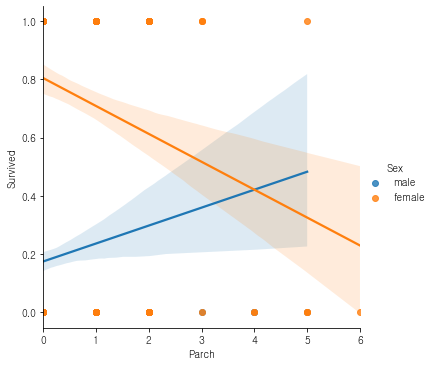

In [23]:
# 부모수+자녀수의 생존률 분석

sns.lmplot('Parch','Survived', hue = 'Sex', data = df)

## 10. test1 생존자 예측

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,성년
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,성년
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,성년
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,성년
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,성년
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,성년
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,미성년
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S,성년
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,성년


In [25]:
del df['Name']
del df['Ticket']
del df['Embarked']
del df['Age_bins']

#범주형 컬럼 처리 (x) 
df['Sex']=df['Sex'].astype('category') 
df['Pclass']=df['Pclass'].astype('category') 
df = pd.get_dummies(df)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,1,0
888,889,0,30.0,1,2,23.4500,0,0,1,1,0
889,890,1,26.0,0,0,30.0000,1,0,0,0,1


In [26]:
drop_column2 = ['PassengerId', 'Survived']
train_data = df.drop(drop_column2, axis=1)
target = df['Survived']

# 데이터 학습, 모델 생성 및 평가에 필요한 패키지들을 import
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.naive_bayes import GaussianNB # 나이브 베이즈 분류
from sklearn.svm import SVC # 서포트 벡터 머신
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

In [27]:
train_data

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,1,0,0,1
887,19.0,0,0,30.0000,1,0,0,1,0
888,30.0,1,2,23.4500,0,0,1,1,0
889,26.0,0,0,30.0000,1,0,0,0,1


In [28]:
clf = LogisticRegression()
clf.fit(train_data, target)
clf.score(train_data, target)

C:\Users\rkdtj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8024691358024691

In [29]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)
clf.score(train_data, target)

0.978675645342312

In [30]:
clf = RandomForestClassifier()
clf.fit(train_data, target)
clf.score(train_data, target)

0.978675645342312

In [31]:
clf = GaussianNB()
clf.fit(train_data, target)
clf.score(train_data, target)

0.7912457912457912

In [32]:
clf = SVC()
clf.fit(train_data, target)
clf.score(train_data, target)

0.6868686868686869

In [33]:
# test1 값 처리
ts = pd.read_csv('C:\\Users\\rkdtj\\Desktop\\titanic\\test1.csv')
del ts['Name']
del ts['Ticket']
del ts['Embarked']

ts['Age'] = ts['Age'].fillna(ts['Age'].mean()) # 나이의 결측치를 나이의 평균값으로 대체
ts['Age'] = ts['Age'].round()
ts.dropna(thresh=int(len(ts) * 0.5), axis=1) #결측치 제거

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,30.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [34]:
#범주형 컬럼 처리 (x) 
ts['Sex']=ts['Sex'].astype('category') 
ts['Pclass']=ts['Pclass'].astype('category') 
ts = ts.dropna(axis = 1)
ts = pd.get_dummies(ts)

ts

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,1,0
888,889,0,30.0,1,2,23.4500,0,0,1,1,0
889,890,1,26.0,0,0,30.0000,1,0,0,0,1


In [35]:
# 의사결정나무가 제일 높게 나옴

clf = DecisionTreeClassifier()
clf.fit(train_data, target)
print(clf.score(train_data, target))

ts_data = ts.drop(drop_column2, axis=1)
predict = clf.predict(ts_data)
print(predict)
print(len(predict))


0.978675645342312
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 

In [36]:
ts = pd.read_csv('C:\\Users\\rkdtj\\Desktop\\titanic\\test1.csv')
ts['n_Survived'] = predict
ts

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [37]:
new_ts1 = ts.copy()
new_ts1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [38]:
# 백업 엑셀 파일을 생성
new_ts1.to_csv('C:\\Users\\rkdtj\\Desktop\\titanic\\new_ts1.csv')

## 11. train의 survived와 test1의 survived를 비교하여 survived 추정성공 비율 확인

In [39]:
df = pd.read_csv('C:\\Users\\rkdtj\\Desktop\\titanic\\train.csv')

new_ts1['comp'] = (df['Survived'] == new_ts1['n_Survived'])
new_ts1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_Survived,comp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,True


In [40]:
c = new_ts1['comp'].sum()
c

872

In [41]:
c/len(new_ts1)

0.978675645342312

## 12. test2.csv 추정

In [42]:
ts2 = pd.read_csv('C:\\Users\\rkdtj\\Desktop\\titanic\\test2.csv')
ts2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
del ts2['Name']
del ts2['Ticket']
del ts2['Embarked']
del ts2['Cabin']

#결측치 처리 (x)
ts2['Age'] = ts2['Age'].fillna(ts2['Age'].mean()) # 나이의 결측치를 나이의 평균값으로 대체
ts2['Age'] = ts2['Age'].round()
ts2['Fare'] = ts2['Fare'].fillna(ts['Fare'].mean())
ts2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.0,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,male,30.0,0,0,8.0500
414,1306,1,female,39.0,0,0,108.9000
415,1307,3,male,38.0,0,0,7.2500
416,1308,3,male,30.0,0,0,8.0500


In [44]:
#범주형 컬럼 처리 (x) 
ts2['Sex']=ts2['Sex'].astype('category') 
ts2['Pclass']=ts2['Pclass'].astype('category')
ts = ts.dropna(axis = 1)
ts2 = pd.get_dummies(ts2)

ts2

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,892,34.0,0,0,7.8292,0,0,1,0,1
1,893,47.0,1,0,7.0000,0,0,1,1,0
2,894,62.0,0,0,9.6875,0,1,0,0,1
3,895,27.0,0,0,8.6625,0,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,30.0,0,0,8.0500,0,0,1,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0
415,1307,38.0,0,0,7.2500,0,0,1,0,1
416,1308,30.0,0,0,8.0500,0,0,1,0,1


In [45]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)
print(clf.score(train_data, target))

ts2_data = ts2.drop("PassengerId", axis=1)
predict = clf.predict(ts2_data)
print(predict)
print(len(predict))


0.978675645342312
[0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]
418


In [46]:
submission = pd.DataFrame({
    'PassengerId' : ts2['PassengerId'],
    'Survived' : predict})

submission.to_csv('C:\\Users\\rkdtj\\Desktop\\titanic\\1658001_submission.csv', index=False)